In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats

Assignement 8 ACVD

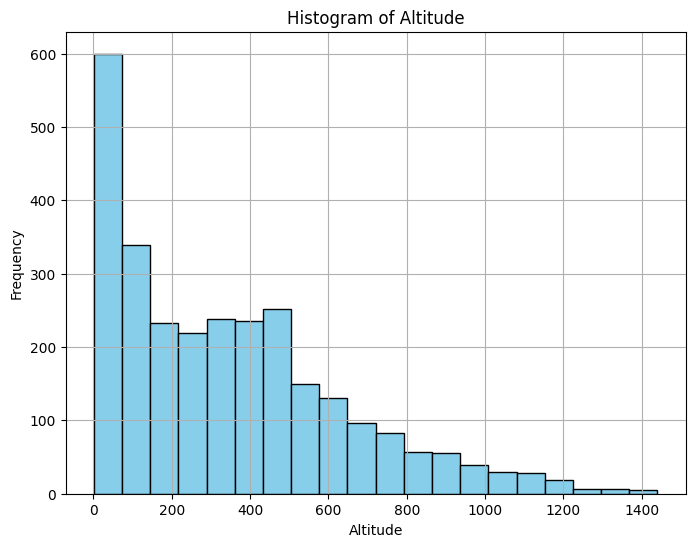

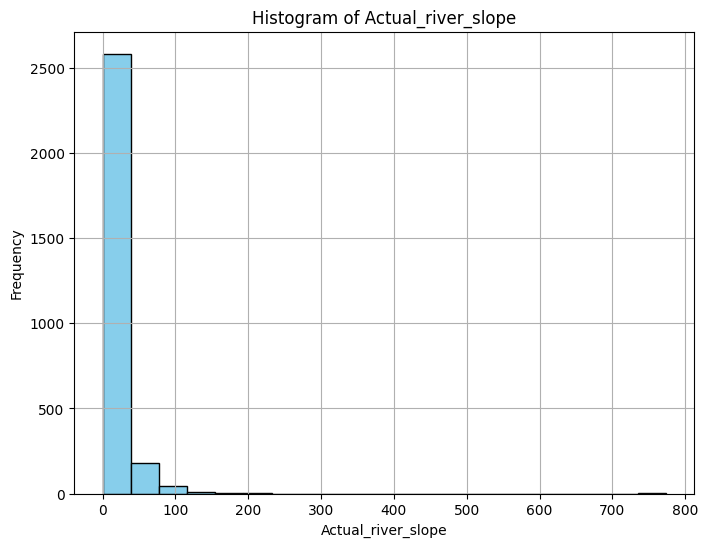

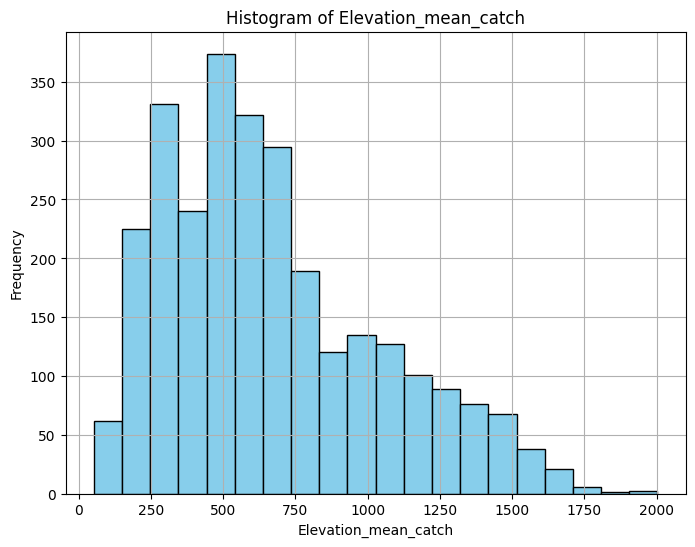

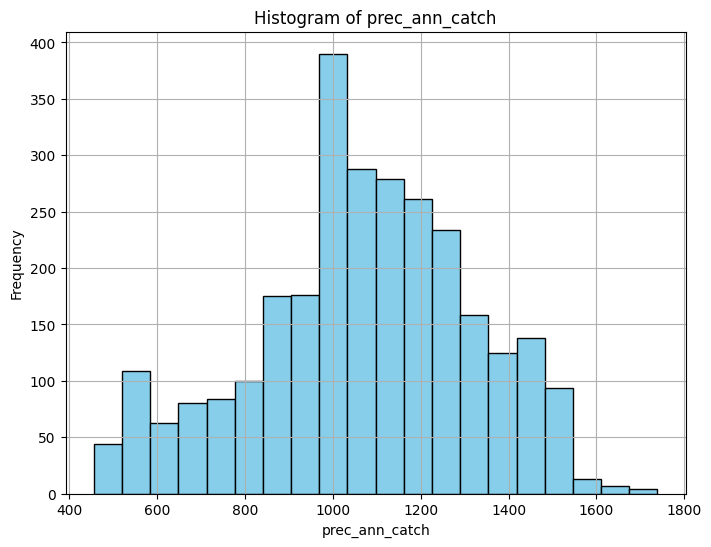

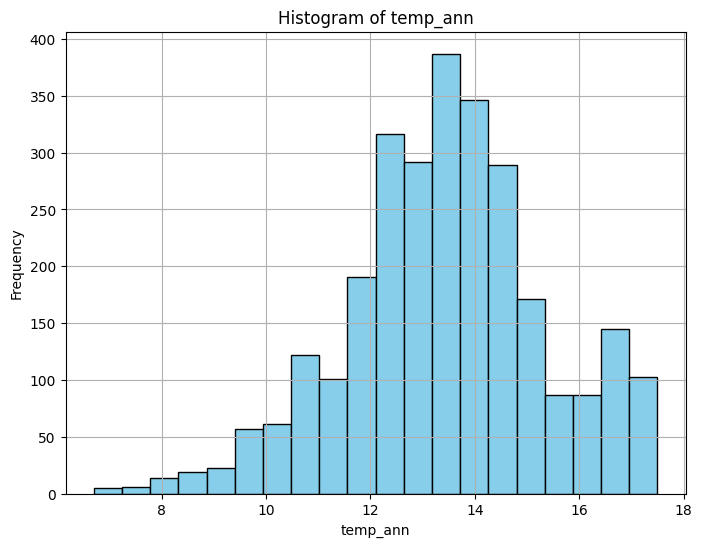

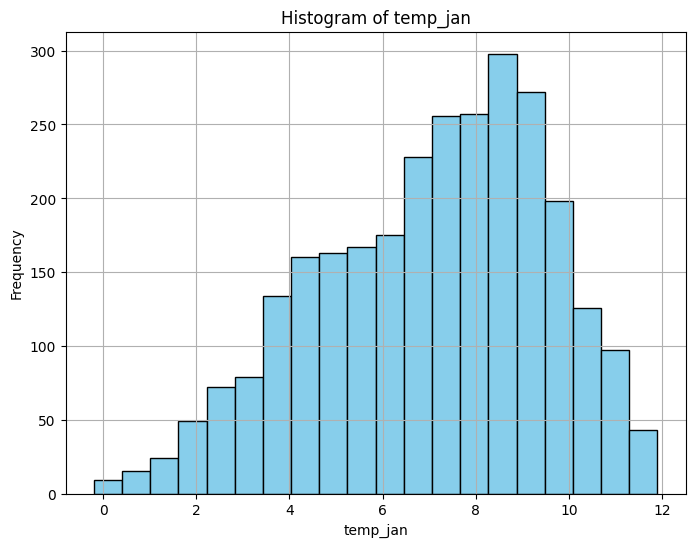

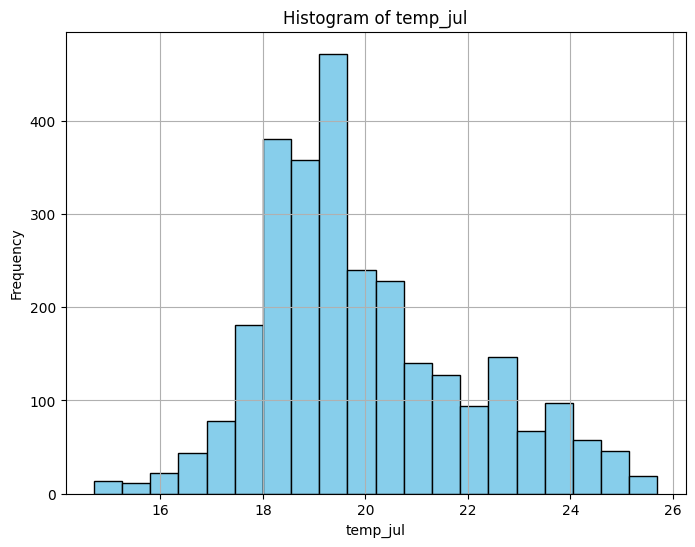

In [40]:

# Load the dataset
df_EFI = pd.read_csv('/content/drive/MyDrive/EFIplus_medit.csv', delimiter=";")


# Select the continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Remove rows with NaN values

df_EFI=df_EFI.dropna()

# Create histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_EFI[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

We have to transform
-Altitude
-river slope

We will do a boxcox transformation

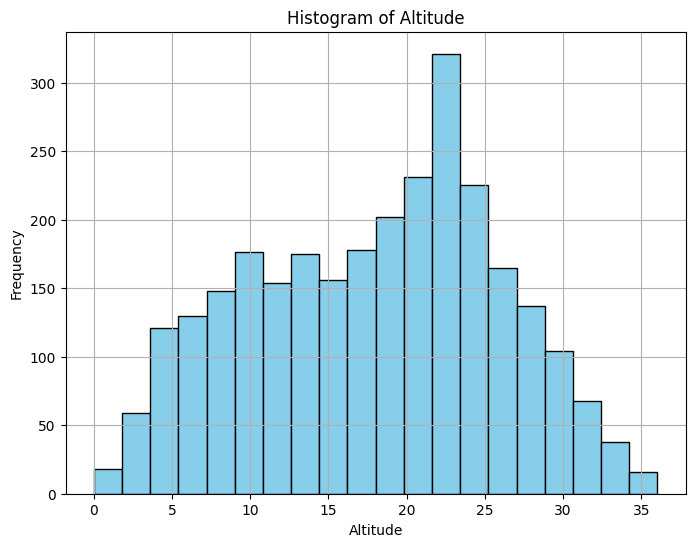

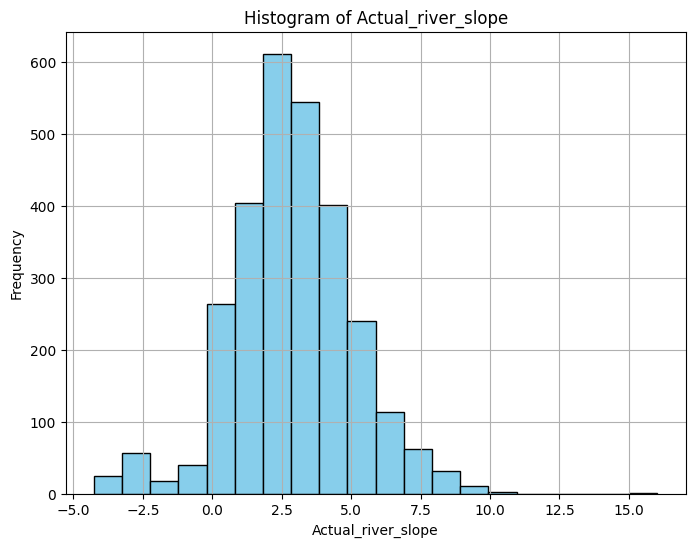

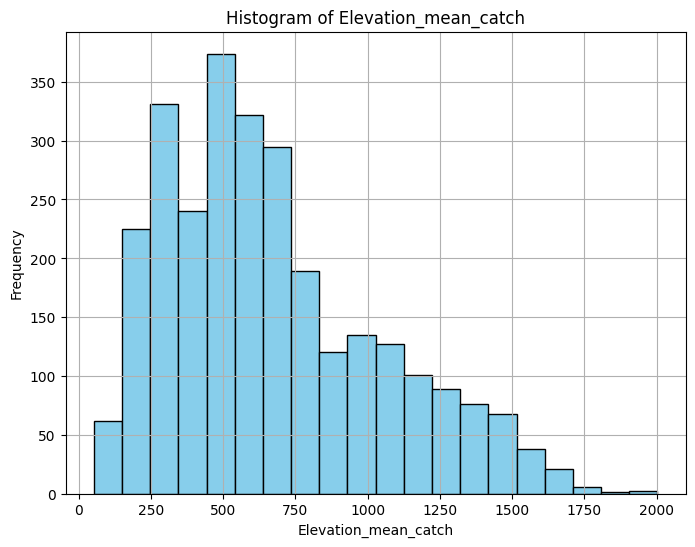

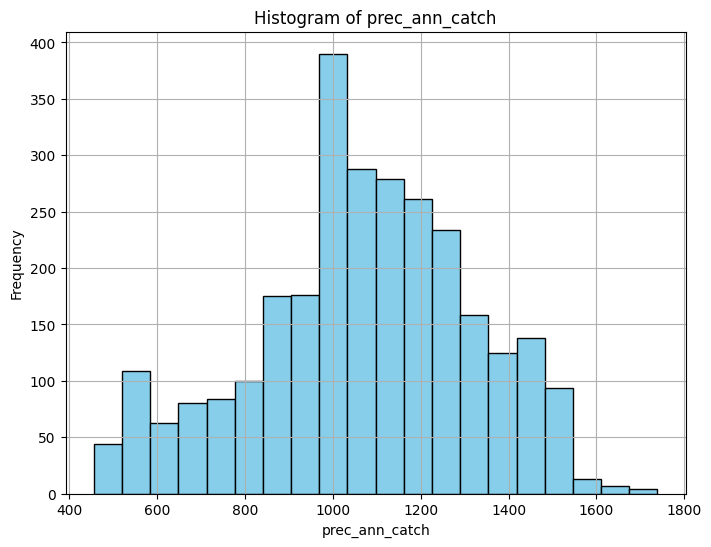

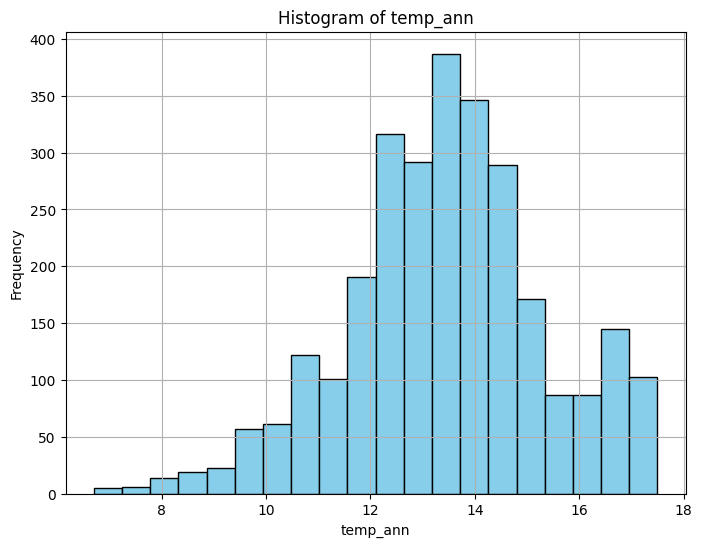

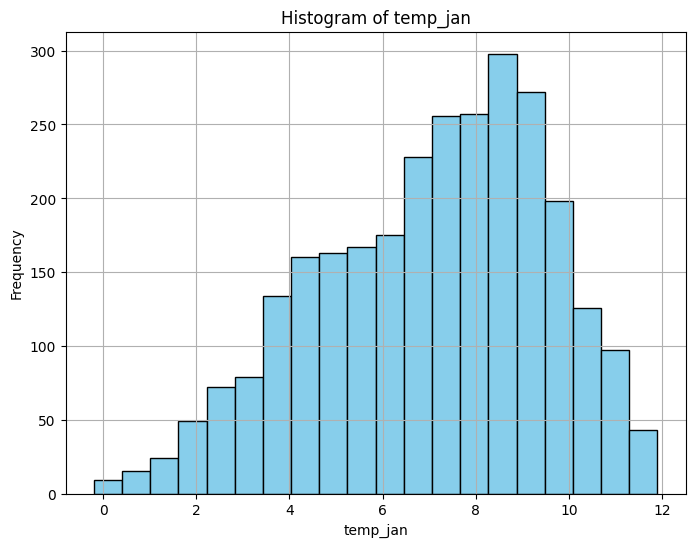

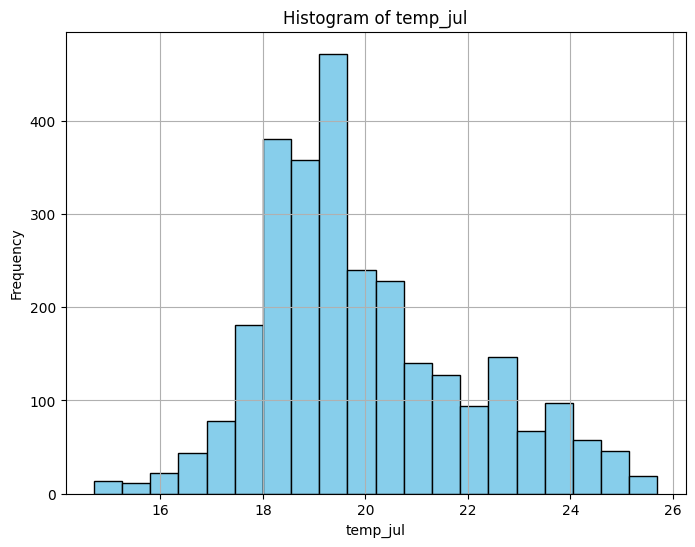

In [41]:
import numpy as np
from scipy import stats

modify_var = ['Altitude', 'Actual_river_slope']
df_EFI_normalized = df_EFI.copy()

# Add a small constant value to ensure all values are positive
epsilon = 0.0000000000000000000001  # You can adjust the value based on your data

# Apply box-cox transformation to each variable
for var in modify_var:
    df_EFI_normalized[var], _ = stats.boxcox(df_EFI[var] + epsilon)

# Create histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_EFI_normalized[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

species richness

In [42]:
# Select species columns
species_columns = df_EFI_normalized.columns[df_EFI_normalized.columns.get_loc('Abramis brama'):]

# Calculate species richness for each sampling site
df_EFI_normalized['Species_Richness'] = df_EFI_normalized[species_columns].sum(axis=1)

# Display the first few rows of the DataFrame with species richness
print(df_EFI_normalized[['Site_code', 'Species_Richness']].head(20))

      Site_code  Species_Richness
18   ES_03_0001                 6
19   ES_03_0002                 6
28   ES_03_0012                 7
32   ES_03_0016                 8
43   ES_03_0029                 7
44   ES_03_0030                 7
60   ES_03_0046                 4
66   ES_03_0053                 7
71   ES_03_0058                 5
91   ES_04_0002                 5
92   ES_04_0003                 5
93   ES_04_0004                 8
94   ES_04_0005                 6
101  ES_05_0012                 7
102  ES_05_0013                 2
126  ES_07_0009                 2
127  ES_07_0010                 3
128  ES_07_0011                 3
169  ES_09_0001                 6
179  ES_09_0011                 7


Regression coefficient (slope): -0.12871594109203305
Intercept: 5.725038027782885
R-squared: 0.17712098448396923
F-statistic: 606.9922392316281


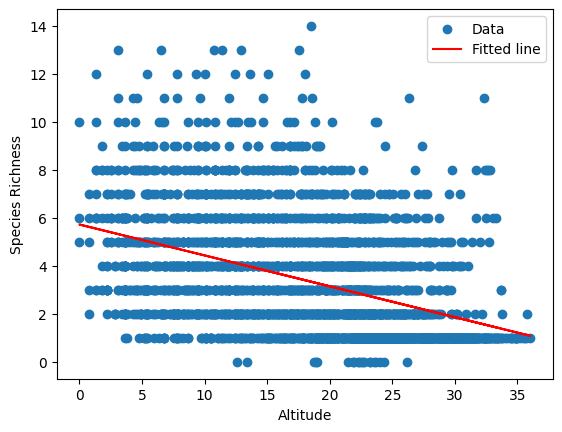

Regression coefficient (slope): -0.47995330505106504
Intercept: 4.805961037123883
R-squared: 0.18148584417209288
F-statistic: 625.2672319975196


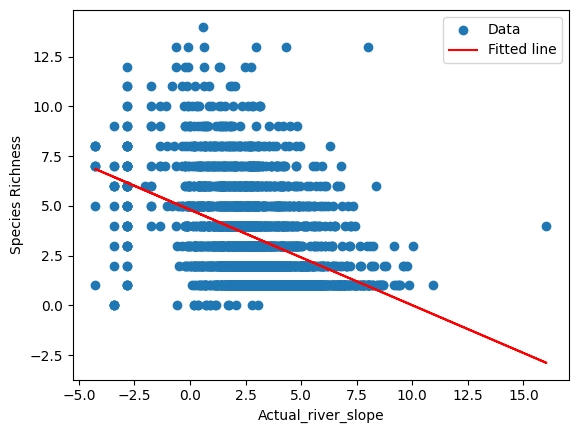

Regression coefficient (slope): -0.001976301030665429
Intercept: 4.739829123421911
R-squared: 0.09094710974994516
F-statistic: 282.1297333143041


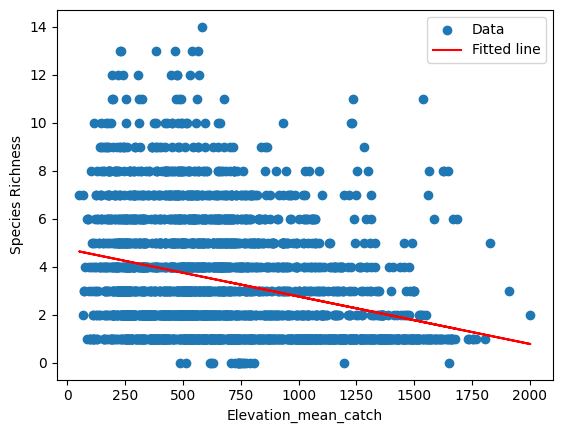

Regression coefficient (slope): -0.002568832648208982
Intercept: 6.166748961956724
R-squared: 0.07013915039928931
F-statistic: 212.71183124972882


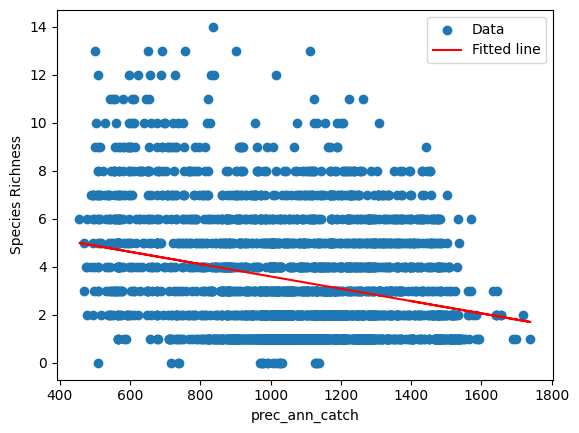

Regression coefficient (slope): 0.6775477439874384
Intercept: -5.6823650526403515
R-squared: 0.28256064997231917
F-statistic: 1110.6458446852637


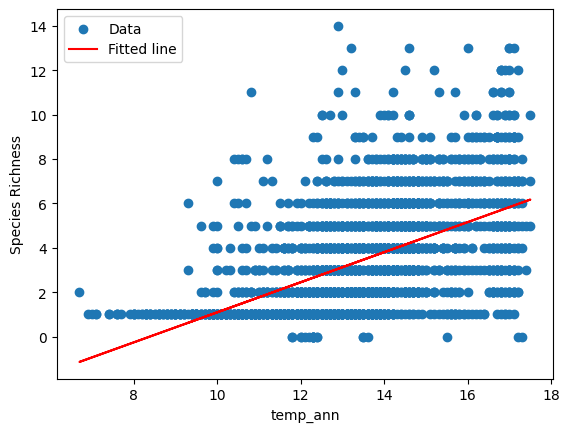

Regression coefficient (slope): 0.35528305165056867
Intercept: 0.9156008548939254
R-squared: 0.12706839635745665
F-statistic: 410.49364719158615


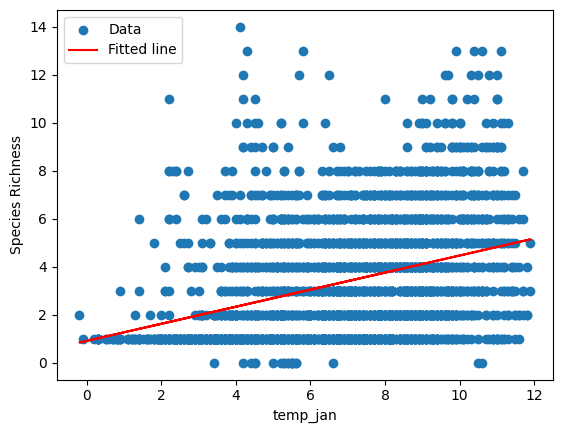

Regression coefficient (slope): 0.6957113106075014
Intercept: -10.439873916324899
R-squared: 0.3336878241308396
F-statistic: 1412.250440750982


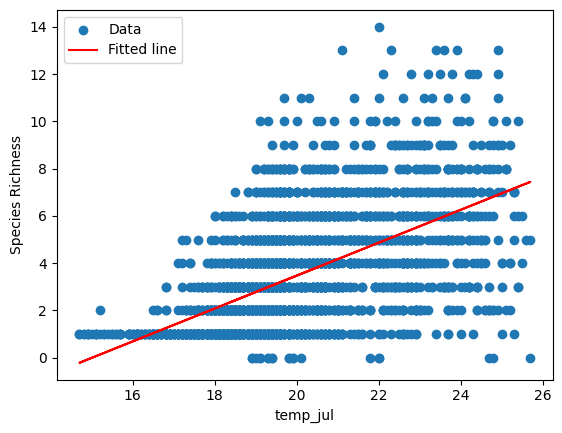

In [43]:
from scipy import stats
import matplotlib.pyplot as plt



# Function to perform linear regression and plot the fitted model
def linear_regression_and_plot(x, y, xlabel):

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f"Regression coefficient (slope): {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"F-statistic: {((r_value**2) / (1 - r_value**2)) * ((len(x) - 2) / 1)}")

    plt.scatter(x, y, label='Data')
    plt.plot(x, slope * x + intercept, color='red', label='Fitted line')
    plt.xlabel(xlabel)
    plt.ylabel('Species Richness')
    plt.legend()
    plt.show()

# Iterate over each continuous variable
for var in continuous_vars:

    x = df_EFI_normalized[var]
    y = df_EFI_normalized['Species_Richness']

    # Perform linear regression and plot the fitted model
    linear_regression_and_plot(x, y, var)

In [44]:
import statsmodels.api as sm



# Add a constant term for the intercept
X = sm.add_constant(df_EFI_normalized[continuous_vars])

# Fit the multiple linear regression model
model = sm.OLS(df_EFI_normalized['Species_Richness'], X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     311.2
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        10:52:09   Log-Likelihood:                -5703.9
No. Observations:                2822   AIC:                         1.142e+04
Df Residuals:                    2814   BIC:                         1.147e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9342 

The r squared coef is 0,43 wich is not really good but it is still better than with the simple linear regression where the r2 coef where between (0.07 and 0.33)

In [17]:
# Code to produce functions to run diagnostic plots
# https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """


    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)


    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax



    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

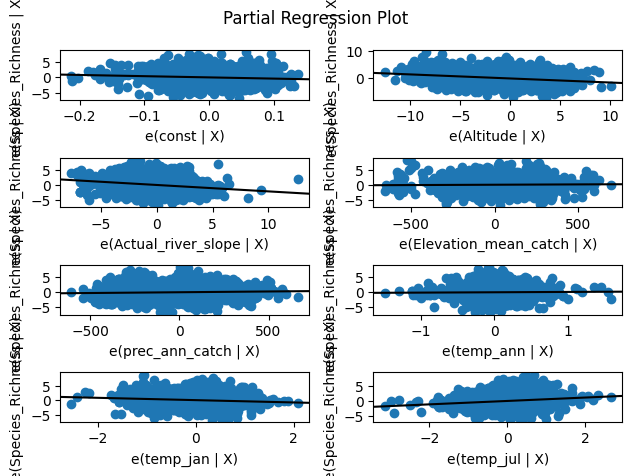

In [45]:
# Plot partial regression plots for each variable
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)
plt.show()

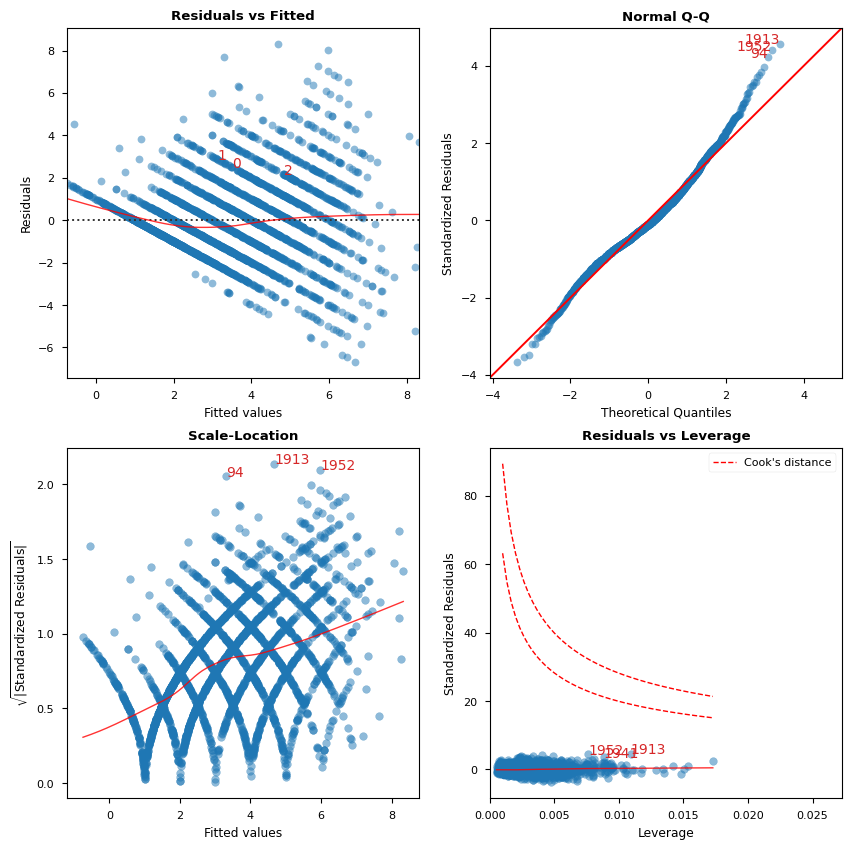

               Features  VIF Factor
2    Actual_river_slope        1.34
4        prec_ann_catch        1.47
1              Altitude        4.95
3  Elevation_mean_catch        5.53
7              temp_jul       13.61
6              temp_jan       26.80
5              temp_ann       50.06
0                 const      434.62
                                 OLS Regression Results                                
Dep. Variable:       Species_Richness   R-squared (uncentered):                   0.615
Model:                            OLS   Adj. R-squared (uncentered):              0.614
Method:                 Least Squares   F-statistic:                              1500.
Date:                Thu, 09 May 2024   Prob (F-statistic):                        0.00
Time:                        10:55:49   Log-Likelihood:                         -6705.0
No. Observations:                2822   AIC:                                  1.342e+04
Df Residuals:                    2819   BIC:                

In [46]:
# Run diagnostic plots

continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

cls = Linear_Reg_Diagnostic(results)
fig, ax = cls()

# Extract VIF values from the diagnostic plot


# Identify variables with high VIF (>5) and remove them

continuous_vars.remove('temp_ann')
continuous_vars.remove('temp_jan')
continuous_vars.remove('temp_jul')
continuous_vars.remove('Elevation_mean_catch')

# Fit the new model
new_model = sm.OLS(df_EFI_normalized['Species_Richness'], X[continuous_vars])
new_results = new_model.fit()

# Print coefficients
print(new_results.summary())


With this model the r2 coef is 0.615 This moedel is the best we have
